**Importing Libraries**

In [22]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from sklearn import datasets

**Loading and Splitting the Data**

In [23]:
# Loading the data
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))

train_set_x_orig = []
train_set_y = []
test_set_x_orig = []
test_set_y = []
classes = ['even', 'odd']

data_size = len(images_and_labels)
test_set_size = 200  # Setting the testset size

# Splitting the data into training and test sets and assigning the labels (Even = 0, Odd = 1)
for i in range(len(images_and_labels))[:-test_set_size]:
    train_set_x_orig.append(images_and_labels[i][0])
    if images_and_labels[i][1] % 2 == 0: ##if even put 0 as the label
        train_set_y.append(0)
    else: ##if odd put 1 as the label
        train_set_y.append(1)

for i in range(len(images_and_labels))[-test_set_size:]:
    test_set_x_orig.append(images_and_labels[i][0])
    if images_and_labels[i][1] % 2 == 0: ##if even put 0 as the label
        test_set_y.append(0)
    else: ##if odd put 1 as the label
        test_set_y.append(1)

train_set_x_orig = np.array(train_set_x_orig)
train_set_y = np.array(train_set_y).reshape(1, data_size - test_set_size)
test_set_x_orig = np.array(test_set_x_orig)
test_set_y = np.array(test_set_y).reshape(1, test_set_size)

print(train_set_x_orig.shape, train_set_y.shape, test_set_x_orig.shape, test_set_y.shape)


(1597, 8, 8) (1, 1597) (200, 8, 8) (1, 200)


**Visualizing a Training Example**

y = [1], it's a 'odd'. 


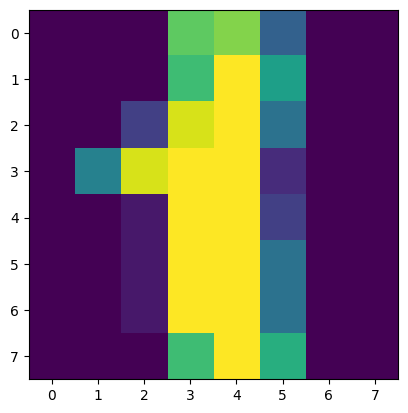

In [24]:
## Display an example from the data
index = 1
plt.imshow(train_set_x_orig[index])
print(f"y = {str(train_set_y[:, index])}, it's a '{classes[np.squeeze(train_set_y[:, index])]}'. ")


**Flatten and Standardizing the Data**

In [25]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[2]

##Description of the data
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ")")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: m_train = 1597
Number of testing examples: m_test = 200
Height/Width of each image: num_px = 8
Each image is of size: (8, 8)
train_set_x shape: (1597, 8, 8)
train_set_y shape: (1, 1597)
test_set_x shape: (200, 8, 8)
test_set_y shape: (1, 200)


In [26]:
# Reshape the training and test examples from 2D matrix to a 1D vector. The input vector of a neural network is always 1D
train_set_x_flatten = train_set_x_orig.reshape(m_train, num_px * num_px).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, num_px * num_px).T

# Print the description after reshaping
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

# Standardize the data (pixel values between 0 and 1)
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

train_set_x_flatten shape: (64, 1597)
train_set_y shape: (1, 1597)
test_set_x_flatten shape: (64, 200)
test_set_y shape: (1, 200)


**Sigmoid Function**

In [27]:
# Implement sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


**Initializing the Parameters**

In [28]:
# Initialize weights and bias with zeros
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b


**Forward and Backward Propagation**

In [29]:
# Implementing forward and backward propagation
def propagate(w, b, X, Y):
    m = X.shape[1]

    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # Backward propagation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    cost = np.squeeze(cost)

    grads = {"dw": dw, "db": db}

    return grads, cost


**Gradient Descent Optimization**

In [30]:
# Gradient descent optimization
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs


**Prediction Function**

In [31]:
# Prediction function
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    Y_prediction = (A >= 0.5).astype(int)

    assert(Y_prediction.shape == (1, m))

    return Y_prediction


**Model Building**

In [32]:
# Building the model
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100} %")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d


Training the Model

In [33]:
# Train the model
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)


Cost after iteration 0: 0.6931471805599451
Cost after iteration 100: 0.6929905102389343
Cost after iteration 200: 0.6928350450548796
Cost after iteration 300: 0.6926805287119292
Cost after iteration 400: 0.6925267636319519
Cost after iteration 500: 0.6923735974996924
Cost after iteration 600: 0.6922209128908674
Cost after iteration 700: 0.6920686192768849
Cost after iteration 800: 0.6919166468616496
Cost after iteration 900: 0.6917649418306623
Cost after iteration 1000: 0.6916134626887976
Cost after iteration 1100: 0.6914621774372917
Cost after iteration 1200: 0.6913110613976331
Cost after iteration 1300: 0.6911600955341185
Cost after iteration 1400: 0.6910092651608001
Cost after iteration 1500: 0.6908585589447411
Cost after iteration 1600: 0.6907079681376764
Cost after iteration 1700: 0.6905574859837409
Cost after iteration 1800: 0.6904071072629171
Cost after iteration 1900: 0.6902568279391023
train accuracy: 61.23982467125861 %
test accuracy: 63.0 %


**Predict and Visualize**

y = 1, predicted: odd


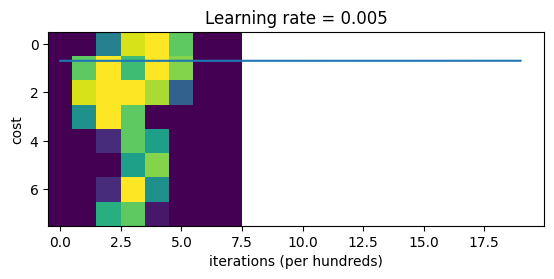

In [34]:
# Predicting an image from the test set
index = 65  # Choosing an index to visualize
plt.imshow(test_set_x[:, index].reshape((num_px, num_px)))
print(f"y = {test_set_y[0, index]}, predicted: {classes[d['Y_prediction_test'][0, index]]}")

# Plotting the cost
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title(f"Learning rate = {d['learning_rate']}")
plt.show()


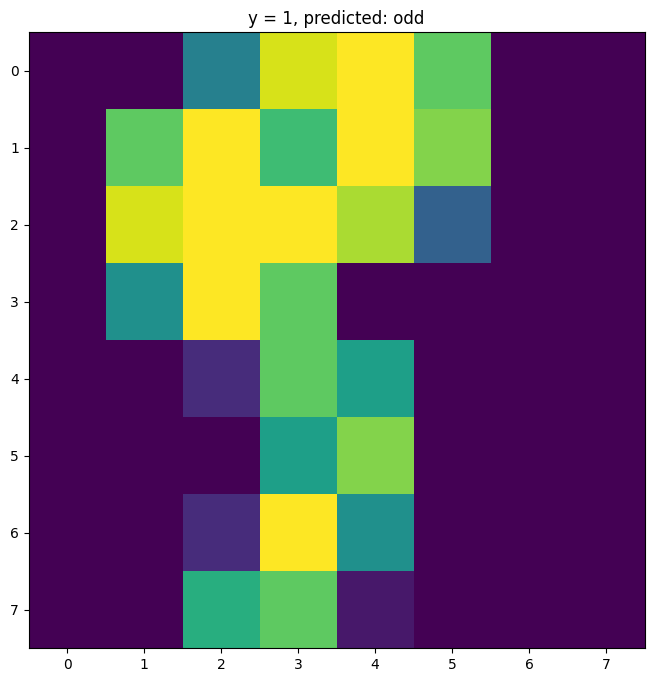

In [35]:
# Predictting an image from the test set and visualize it
index = 65  # Choosing an index to visualize
plt.figure(figsize=(8, 8))
plt.imshow(test_set_x[:, index].reshape((num_px, num_px)))
plt.title(f"y = {test_set_y[0, index]}, predicted: {classes[d['Y_prediction_test'][0, index]]}")
plt.show()



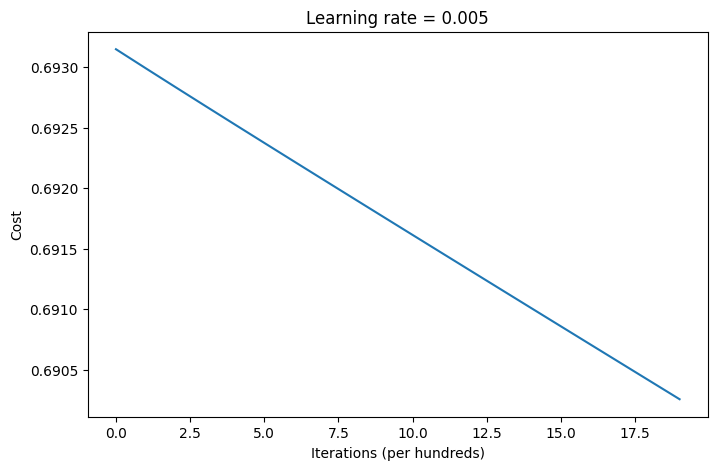

In [36]:
# Plot the cost vs. iterations
costs = np.squeeze(d['costs'])
plt.figure(figsize=(8, 5))
plt.plot(costs)  # Plotting the cost function
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title(f"Learning rate = {d['learning_rate']}")
plt.show()
